<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#§0.-主成分分析" data-toc-modified-id="§0.-主成分分析-1">§0. 主成分分析</a></span></li><li><span><a href="#§2.-2変量の場合の主成分の導出-(-1-)" data-toc-modified-id="§2.-2変量の場合の主成分の導出-(-1-)-2">§2. 2変量の場合の主成分の導出 ( 1 )</a></span><ul class="toc-item"><li><span><a href="#はじめに" data-toc-modified-id="はじめに-2.1">はじめに</a></span><ul class="toc-item"><li><span><a href="#主成分について" data-toc-modified-id="主成分について-2.1.1">主成分について</a></span></li><li><span><a href="#最大化問題" data-toc-modified-id="最大化問題-2.1.2">最大化問題</a></span></li><li><span><a href="#固有値問題" data-toc-modified-id="固有値問題-2.1.3">固有値問題</a></span></li><li><span><a href="#固有分解" data-toc-modified-id="固有分解-2.1.4">固有分解</a></span></li><li><span><a href="#3次元空間での最大値" data-toc-modified-id="3次元空間での最大値-2.1.5">3次元空間での最大値</a></span></li></ul></li><li><span><a href="#ex.1" data-toc-modified-id="ex.1-2.2">ex.1</a></span></li><li><span><a href="#寄与率" data-toc-modified-id="寄与率-2.3">寄与率</a></span></li></ul></li><li><span><a href="#§3.-2変量の場合の主成分の導出-(-2-)" data-toc-modified-id="§3.-2変量の場合の主成分の導出-(-2-)-3">§3. 2変量の場合の主成分の導出 ( 2 )</a></span></li><li><span><a href="#§4.-変量の標準化" data-toc-modified-id="§4.-変量の標準化-4">§4. 変量の標準化</a></span></li><li><span><a href="#§5.-p変量の場合の主成分の導出-(-1-)" data-toc-modified-id="§5.-p変量の場合の主成分の導出-(-1-)-5">§5. p変量の場合の主成分の導出 ( 1 )</a></span></li><li><span><a href="#§9.-具体的な適用例" data-toc-modified-id="§9.-具体的な適用例-6">§9. 具体的な適用例</a></span></li></ul></div>

In [1]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "IPAexGothic"

# §0. 主成分分析

以下では教科書に沿って、概要と各種の導出を議論する。
内容が理解できれば、次の手順まとめが役に立つはず（理解するのを諦めて、こういうもんだと思い込むのも重要かな）。


1. データセットを標準化する（平均0、分散1にする）
2. 共分散行列を計算する (`np.cov()`)
3. 固有ベクトルと固有値を計算する (`np.linalg.eig()`)
4. 固有値の大きい順に並び替える
5. 上位 $k$ 個の固有ベクトルを選択する ($k$をどう選択するかは問題依存）
6. 射影行列を作成し、データセットを変換する

# §2. 2変量の場合の主成分の導出 ( 1 )

## はじめに

主成分と、固有値問題への帰着について議論する。

### 主成分について

多次元の変量の値をできるだけ情報が損失しないように、少数この総合的指標で代表させる方法である。指標の一つとしてよく使用される。


多次元の変量（$x_1, x_2, ...,x_n$）を代表する変量を探すために、それらを線形結合した $z$ という合成変量を考える。この合成変量について

- 分散が大きくなるように $z$ を定義する
- 生の変量よりも分散が大きくなれば、データセットを代表する変量と考えて差し支えない

という考えに基づく。この合成変量を主成分と呼ぶ。

$$
z = \sum_{i=1}^2 a_ix_i = a_1x_1 + a_2x_2
$$

個々の変量 $x_i$ の値を使用するのではなく、分散の大きい $z$ を使用することができれば次元圧縮が可能となる。
また個々の変量だけではわからなかったデータ間の関係性も抽出できるようになる（かもしれない、それはデータによる）。
合成変量 $z$ の分散は以下のように計算できる：

$$
V(z) = \frac{1}{n} \sum_{i=1}^n \left( z_i - \bar{z} \right)^2 = \frac{1}{n} \sum_i \left( \sum_{j=1}^p a_jx_{ij} -  \sum_{j=1}^p a_j\bar{x_{j}} \right)^2 
= a_{1}^2 s_{11} + 2a_1a_2 s_{12} + a_2^2s_{22}
$$

$s_{11}, s_{22}$は分散、$s_{12}$は共分散を表す。


主成分は、二次元平面上で分散が最大となる $Z$ という新しい座標軸を見つけることに相当する。
データセット $(x_1, x_2)$ を $Z$ 上に射影して、その $Z$ 上での分散が最大となるようにパラメータを設定する。
幾何学的な要請から、求めたい係数は以下の制約条件を持つ。

$$
a_1^2 + a_2^2 =1
$$


### 最大化問題

以上の問題は、制約条件 $a_1^2+a_2^2$ の元で $V(z)$ を最大化する問題に読み直すことができる。ラグランジュの未定乗数法から、

$$
F = a_{1}^2 s_{11} + 2a_1a_2 s_{12} + a_2^2s_{22} - \lambda(a_1^2+a_2^2 - 1)
$$

を最大化する様に $a_1, a_2, \lambda$ を求めれば良い。それぞれで偏微分をすると （$\lambda$で偏微分したときには制約条件が出てくるだけなのでほっておいて）

$$
a_1s_{11} + a_2s_{12} = \lambda a_1 \\
a_1s_{12} + a_2s_{22} = \lambda a_1 
$$

から、係数行列を用いて行列表示を行うと

$$        
\left[\begin{array}{cc}
    s_{11} & s_{12} \\
    s_{12} & s_{22} \\
\end{array}\right]
\left[\begin{array}{c}
    a_{1} \\
    a_{2} \\
\end{array}\right]
= 
\lambda
\left[\begin{array}{c}
    a_{1} \\
    a_{2} \\
\end{array}\right]
$$

となる。分散・共分散はデータから計算できる値なので、係数行列（=ここでは共分散行列）を $A$ とすると:

$$
A v = \lambda v
$$
これは単に固有値問題を解けばいいこととなる。
さらに計算を進めると、分散が最大となる時には

$$
V(z) = \lambda_1
$$

が成立するので、固有値問題を解いて、そのうち大きい方の固有値に対応する固有ベクトル $[a_1, a_2]^T$ を用いて $z$ を定義すれば、
それが分散を最大にする主成分（第一主成分） となる。


### 固有値問題

「固有値問題」とは、固有値 （と、それに付随する固有ベクトル） を求める問題。

上で議論したように、「最大の分散をとる合成変量を計算したい」という前提は、

$$
A v = \lambda v
$$

において $v$ と $\lambda$ の値を求める問題に帰着する。
これは線形代数でいうところの固有値問題（$v$が固有ベクトル、$\lambda$が固有値）なので、主成分分析 = 固有値問題、という構図になる。

ただ難しいことを考えずに単純には、求めたいものは $a_i$ と $\lambda_i$ であり、

$$
a_1s_{11} + a_2s_{12} = \lambda a_1 \\
a_1s_{12} + a_2s_{22} = \lambda a_1 
$$

と、係数がゼロ以外の値を持つための条件 (ゼロでもいいが、意味をなさない）

$$
det A = 0
$$

より、ただただ連立方程式を解くだけでよい。
で、その「ただただ解く」というのが難しい (or 面倒) なので、線形代数の知識を使って、もう少し見通しよく計算していくことになる。


### 固有分解

２変数のデータから共分散行列を作成し、`numpy.linalg`のメソッドを用いて固有分解（固有値分解）する。

そもそも固有値とは

$$
Ax = \lambda x
$$

の係数 $\lambda$ のことである。固有値は一つだけとは限らず複数個存在し、それに対応するベクトル$x$（固有ベクトル）も複数存在する。そこで、固有値を対角成分に並べた行列と、固有ベクトルを横に並べた行列を用意すると、それら複数の解は一行で表すことができる。例えば$3\times3$行列の場合

$$        
\Lambda = 
\left[\begin{array}{ccc}
    \lambda_1 & 0             & 0  \\
     0            & \lambda_2 & 0  \\
     0            & 0             & \lambda_3
\end{array}\right]
$$

$$
X =
\left( \vec{x}~~\vec{y}~~\vec{z} \right)
=
\left[\begin{array}{ccc}
    x_{1} & y_{1} & z_{1}  \\
    x_{2} & y_{2} & z_{2}  \\
    x_{3} & y_{3} & z_{3}  \\
\end{array}\right]
$$

を用意すると

$$
AX = X\Lambda 
$$

で全ての固有値と固有ベクトルを含んだ関係式を記述することができる（$\Lambda$を掛ける方向が少し直感と反しているので注意）。このときに、両辺右から$X^{-1}$を掛けることで行列式$A$について方程式を書き直すことができ：

$$
A = X\Lambda X^{-1}
$$

行列 $A$ を分解できていると捉えることができる。
このように、固有値と固有ベクトルで表された関係式に分解することを固有分解と呼ぶ。

### 3次元空間での最大値

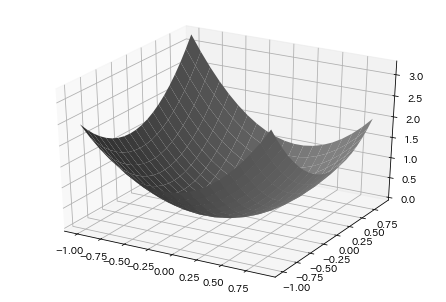

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 2次元のダミーデータ
np.random.seed(123)
dummy = np.random.randn(2, 10)
cov = np.cov(dummy)

# 合成変量の係数
a1 = np.arange(-1, 1, 0.1)
a2 = np.arange(-1, 1, 0.1)
a11, a22 = np.meshgrid(a1, a2)
z = a11**2 * cov[0,0] + 2 * a11 * a22 * cov[0,1] + a22**2 * cov[1,1]

fig = plt.figure()
ax1 = Axes3D(fig)
 
#ax1.plot_wireframe(a11, a22, z, color="gray")
ax1.plot_surface(a11, a22, z, color="gray")
#ax1.scatter3D(X, Y, Z)
ax1.set_label("a1")
ax1.set_label("a2")
#ax1.view_init(40, 20)
    
plt.show()

## ex.1

In [3]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    "x1" : [29, 71, 74, 52, 77, 60, 81, 61, 70, 53, 69, 87, 83, 76, 87, 77, 38, 67, 83, 47, 70, 81, 51 ],
    "x2" : [33, 68, 91, 56, 92, 85, 91, 84, 75, 70, 64, 89, 75, 61, 82, 80, 43, 73, 77, 61, 62, 51, 16 ],
    "x3" : [55, 72, 79, 58, 96, 66, 73, 72, 81, 73, 96, 90, 96, 67, 78, 78, 45, 78, 80, 56, 88, 63, 36 ],
    "x4" : [79, 64, 76, 60, 88, 66, 63, 78, 67, 51, 57, 85, 81, 57, 82, 70, 12, 67, 67, 21, 51, 66, 48],
    "x5" : [84, 97, 100, 85, 98, 88, 95, 92, 96, 92, 97, 100, 98, 86, 97, 94, 96, 95, 100, 95, 96, 92, 84],
}
)
df

,x1,x2,x3,x4,x5
0,29,33,55,79,84
1,71,68,72,64,97
2,74,91,79,76,100
3,52,56,58,60,85
4,77,92,96,88,98
5,60,85,66,66,88
6,81,91,73,63,95
7,61,84,72,78,92
8,70,75,81,67,96
9,53,70,73,51,92


In [4]:
np.round(df[["x3", "x5"]].cov() * (len(df)-1)/len(df), 2)

,x3,x5
x3,239.24,53.02
x5,53.02,24.95


In [5]:
mat = np.array(df[["x3", "x5"]])
cov_mat = np.cov(mat.T, bias=True)

固有値分解は`numpy`の`linalg.eig`を用いることで簡単に行うことができる。留意点としては、固有値ベクトルではなく、ベクトルを行列としてまとめたものが返ってくるので、要素にアクセスする時に添え字の範囲を間違えてはいけない。

In [6]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print("固有値： \n", eigen_vals)
print("固有ベクトル : \n", eigen_vecs)

固有値： 
 [251.64232311  12.55427424]
固有ベクトル : 
 [[ 0.97372618 -0.22772204]
 [ 0.22772204  0.97372618]]


In [7]:
a_1st_1 = eigen_vecs.T[0][0]
a_1st_2 = eigen_vecs.T[0][1]
a_2nd_1 = eigen_vecs.T[1][0]
a_2nd_2 = eigen_vecs.T[1][1]

eigen_vecs.T[0]

array([0.97372618, 0.22772204])

求めた固有値から理解のために視覚化を行う。

$$
z = a_1 x_1 + a_2 x_2 = \mathrm{cos}\theta_1x_1 + \mathrm{sin}\theta_1 x_2
$$

という関係性を思い出すと、新しい座標軸$z$は $\mathrm{tan}\theta_1$だけ、$(x_1,x_2)$座標から回転を受けた軸として記述することができる。さらに見やすくするために、原点を$(0,0)$ではなく、$(\bar{x_1}, \bar{x_2})$に移動させている。

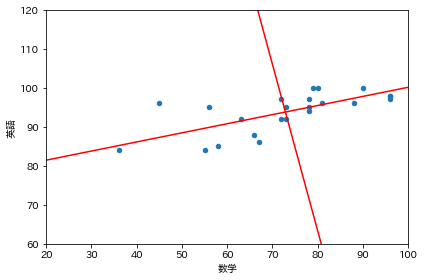

In [8]:
fig, axes = plt.subplots()

df[["x3", "x5"]].plot("x3", "x5", kind="scatter", ax=axes)

x = np.linspace(0,100,10)
axes.plot(x, a_1st_2/a_1st_1 * (x -df["x3"].mean()) + df["x5"].mean(), color="red")
axes.plot(x, a_2nd_2/a_2nd_1 * (x -df["x3"].mean()) + df["x5"].mean(), color="red")

axes.set_xlim(20,100)
axes.set_ylim(60,120)

axes.set_xlabel("数学")
axes.set_ylabel("英語")

plt.tight_layout()

In [9]:
df["z1"] = df["x3"] * a_1st_1 + df["x5"] * a_1st_2
df["z2"] = df["x3"] * a_2nd_1 + df["x5"] * a_2nd_2

## 寄与率
元の変数（ここでは$x3$と$x5$）の分散の総和に対して、$z1$と$z2$の分散の比を取ったものを寄与率と呼ぶ。元々の分散を、新しく定義した主成分がどれくらい説明しているかの指標となる。

ここでは第一主成分が元の変数のばらつきをほとんど説明することができていると理解することができる。

In [10]:
print(round(df["z1"].var()/(df["x3"].var() + df["x5"].var()), 4))
print(round(df["z2"].var()/(df["x3"].var() + df["x5"].var()), 4))

0.9525
0.0475


# §3. 2変量の場合の主成分の導出 ( 2 )

相関係数は

$$
r_{xy} = \frac{ \frac{1}{n} \sum (x_i-\bar{x})(y_i - \bar{y})}{\frac{1}{n}(x_i-\bar{x})^2\frac{1}{n}(x_i-\bar{x})^2} = \frac{s_{xy}}{s_{xx}s_{yy}}
$$

２変量の共分散を、それぞれの分散で割ったものとして定義される。2変数に相関があれば$r_{xy}$は1に近づくため、「どれくらい関係性を持っているか？」を定式化する際に用いることができる。

主成分の導出の2パターン目として、この相関係数に着目した手法を紹介する。求めたいものは以前と変わらず

$$
z = a_1x_1 + a_2x_2
$$

の形式の合成変量であるが、合成変量が元の変量をよく代表するということは、元の変量と合成変量に強い相関があるという仮定に基づく。つまり、この導出手法では。

$$
Q = r^2(x_1,z) + r^2(x_2,z)
$$

を最大化する基準を導入する。

# §4. 変量の標準化

データの平均が0、分散が1になるように調整することを標準化と呼ぶ。留意点として、あくまで平均と分散がその様な値を持つように調整しているだけで、標準正規分布に従うかどうかは前提としていない。標準化を行うことで、スケール（桁数、規模感）の異なる変量同士を同じ土俵で比較することができ、トレーニングの際に値の"大きさ"という情報に左右されなくなる。

また、単位にも影響されない結果を示すことができる。以下の分散共分散行列を考える。初めに単位 $[\mathrm{cm}]$で測定した分散共分散行列とする。

In [11]:
import numpy as np

mat_cm = np.array([
    [1,1],
    [1,5]
])

eigen_vals, eigen_vecs = np.linalg.eig(mat_cm)
print(eigen_vals)

[0.76393202 5.23606798]


次に、$x_1$を cm-->mmに変換した場合の分散共分散行列は

In [12]:
mat_mm = np.array([
    [100,10],
    [10,5]
])

eigen_vals, eigen_vecs = np.linalg.eig(mat_mm)
print(eigen_vals)

[101.0412196   3.9587804]


一般に、各変量についてどの単位を使うのかが適当であるのかは定かではない。その場合、結果がたまたま選んだ単位に依存して決まるのは好ましくないので、通常各々の変量に対して標準化を施して主成分分析を適用することが多い。

教科書では、標準化をせずに分散共分散行列の固有値問題から主成分を求める方法を「分散共分散行列を用いた主成分分析」、標準化して相関行列の固有値問題として求める方法を「相関行列を用いた主成分分析」と呼んで区別している。

# §5. p変量の場合の主成分の導出 ( 1 )

# §9. 具体的な適用例

消費者の試行を把握するための調査についてのデータで議論を行う。
年齢や性別で何か偏りがあるか？ということを調べていく、という想定。
1~9の嗜好度を定義し（数字が大きいほど好まれている）、男女合計785人に聞き取り調査を行った。男女も年齢別に計10個のグループに別れており、各グループでの平均嗜好度を表８にまとめられている。

In [13]:
import pandas as pd

df_tab6 = pd.DataFrame({
   "番号" : [1,2,3,4,5,6,7,8,9,10],
   "性" : ["男","男","男","男","男", "女","女","女","女","女",],
   "人数" :  [94,64,57,50,121,102,64,53,78,102]
})
df_tab6

,番号,性,人数
0,1,男,94
1,2,男,64
2,3,男,57
3,4,男,50
4,5,男,121
5,6,女,102
6,7,女,64
7,8,女,53
8,9,女,78
9,10,女,102


In [14]:
import pandas as pd 

df = pd.read_csv("data_sec2_tab8.csv", header=None)
df.set_index(0, inplace=True)
df_T = df.T
df

,1,2,3,4,5,6,7,8,9,10
0,,,,,,,,,,
ごはん,7.69,7.31,7.47,7.76,7.87,7.51,7.24,7.70,7.91,7.95
お茶漬,6.59,5.56,6.21,6.04,5.81,6.64,6.11,6.53,6.44,6.64
おじや,4.55,4.18,4.36,4.25,4.53,4.60,3.66,4.04,3.68,4.43
やきめし,6.78,6.11,6.30,5.98,5.56,6.37,6.29,5.43,5.32,5.28
親子丼,6.47,6.24,6.02,5.42,5.88,6.00,5.60,4.60,5.40,5.95
...,...,...,...,...,...,...,...,...,...,...
アイスクリーム,8.44,7.52,6.82,6.88,6.05,8.48,8.33,7.25,6.83,6.55
みかん,7.81,7.31,6.93,7.42,6.60,8.10,7.56,7.79,7.82,7.67
バナナ,8.29,7.45,7.00,6.76,6.69,8.14,7.09,6.83,6.83,7.13


まず表8の性別・食品名で分けた平均嗜好度をプロットしてみる。

以下で、男（1〜5）と女（6〜10)にアクセスする方法をまとめる。

In [15]:
df.iloc[:,0:5].T

,ごはん,お茶漬,おじや,やきめし,親子丼,巻寿司,チキンライス,カレーライス,ドライカレー,餅,...,ビスケット,ホットケーキ,チョコレート,シュークリーム,プリン,アイスクリーム,みかん,バナナ,リンゴ,パイ缶
1,7.69,6.59,4.55,6.78,6.47,6.96,6.57,7.32,6.51,6.86,...,6.38,7.41,7.77,7.96,7.62,8.44,7.81,8.29,7.20,7.62
2,7.31,5.56,4.18,6.11,6.24,6.81,5.70,6.95,6.15,6.05,...,5.28,6.97,6.47,7.13,6.48,7.52,7.31,7.45,6.42,7.33
3,7.47,6.21,4.36,6.30,6.02,6.91,5.89,6.02,5.51,5.85,...,5.07,5.91,5.71,6.36,5.75,6.82,6.93,7.00,6.23,6.91
4,7.76,6.04,4.25,5.98,5.42,6.48,5.16,4.98,4.68,6.14,...,3.96,4.96,5.26,6.18,4.69,6.88,7.42,6.76,5.92,6.90
5,7.87,5.81,4.53,5.56,5.88,6.23,5.30,4.88,4.16,6.75,...,4.25,4.86,4.91,5.71,4.65,6.05,6.60,6.69,5.91,6.47


In [16]:
df.iloc[:,5:10].T

,ごはん,お茶漬,おじや,やきめし,親子丼,巻寿司,チキンライス,カレーライス,ドライカレー,餅,...,ビスケット,ホットケーキ,チョコレート,シュークリーム,プリン,アイスクリーム,みかん,バナナ,リンゴ,パイ缶
6,7.51,6.64,4.60,6.37,6.00,7.09,6.07,6.82,5.17,6.71,...,6.28,7.19,7.72,7.92,7.82,8.48,8.10,8.14,6.98,7.33
7,7.24,6.11,3.66,6.29,5.60,7.27,5.56,6.40,4.81,5.39,...,5.21,6.72,7.03,7.59,7.17,8.33,7.56,7.09,6.44,6.69
8,7.70,6.53,4.04,5.43,4.60,7.13,4.50,5.53,4.70,5.42,...,4.65,5.98,6.42,6.87,6.31,7.25,7.79,6.83,6.04,7.23
9,7.91,6.44,3.68,5.32,5.40,6.86,4.92,5.61,4.86,6.03,...,4.49,5.53,5.52,6.77,5.53,6.83,7.82,6.83,6.14,6.79
10,7.95,6.64,4.43,5.28,5.95,7.36,5.33,5.33,3.82,6.59,...,4.64,5.52,5.46,6.43,5.58,6.55,7.67,7.13,6.02,6.70


`sum()`を取ることで各食品での平均嗜好度の和を取ることができ、それをグループの個数で分けることで、その食品に対する男女別の平均嗜好度をプロットすることができる。

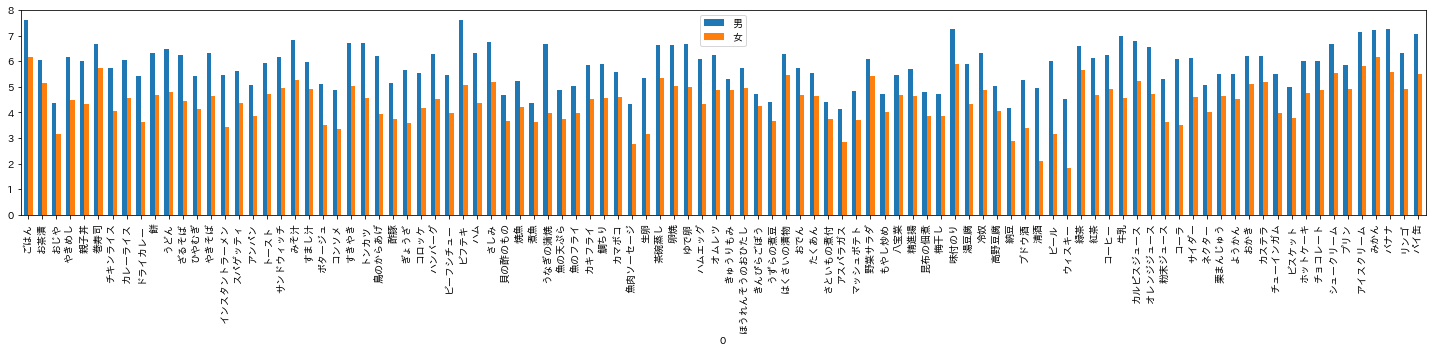

In [17]:
fig, axes = plt.subplots(figsize=(20,5))

df_men_women = pd.DataFrame({
    "男" : df.iloc[:,0:5].T.sum()/5,   
    "女" : df.iloc[:,6:10].T.sum()/5  
}
)

df_men_women.plot.bar(ax=axes, width=0.6)

plt.tight_layout()
plt.show()

上で確認したプロットを見ると、

- 基本的に男性の方が平均嗜好度が高く見える
- 特に男女の差が激しいもの（ウイスキーとか？）がいくつかあるようである

しかし、特に男女の性差は数値の大小にしか現れていないようにも見受けられる。そこで、男女別に分けながら年代別にも分けて平均嗜好度を確認する。

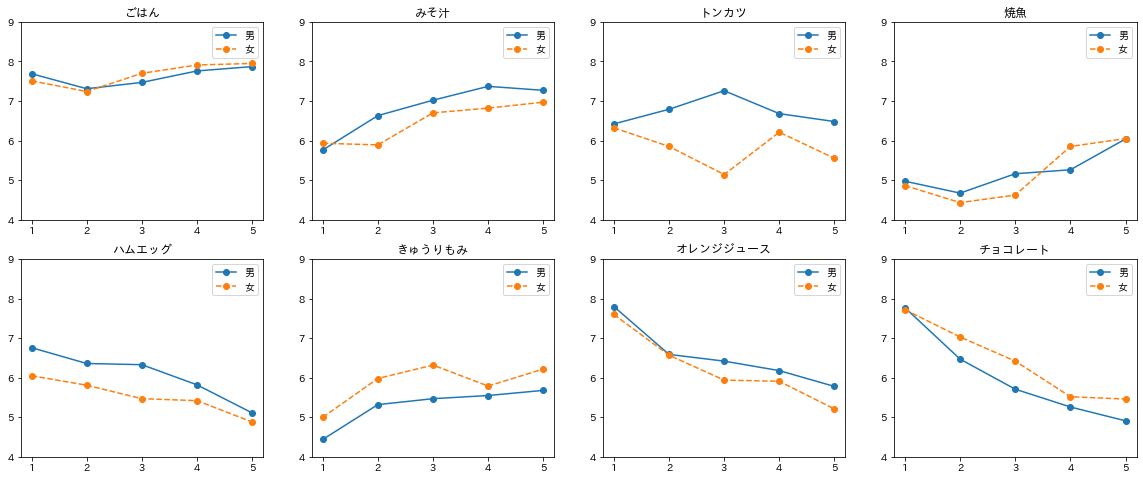

In [18]:
fig = plt.figure(figsize=(20,8))

for idx, food in enumerate(["ごはん", "みそ汁", "トンカツ", "焼魚", "ハムエッグ", "きゅうりもみ", "オレンジジュース", "チョコレート"], start=1):
    
    axes = fig.add_subplot(2,4, idx)
    
    df_T[food][0:5].plot(marker='o', ax=axes, label="男")

    df_women = df_T[food][5:10]
    df_women.index = df_T[food][0:5].index
    df_women.plot( marker='o', ax=axes, linestyle="--", label="女")

    axes.set_title(food)
    axes.set_ylim(4,9)
    axes.set_yticks([4,5,6,7,8,9])
    axes.set_xticks([1,2,3,4,5])
    
    axes.legend()

plt.show()

性・年齢によるグループの平均嗜好度を変量として考え、平均・分散を計算する。

- 男性は年をとると嗜好度のばらつきが小さくなる（女性も同じ傾向がある）
- 男性の方が歳を取ると偏食傾向か？

In [19]:
df9 = pd.DataFrame([df.mean(), df.var()]).T
df9.columns = ["平均", "分散"]
round(df9, 3)

,平均,分散
1,6.028,1.540
2,5.785,1.069
3,5.947,0.682
4,5.669,0.838
5,5.633,0.785
6,5.781,1.676
7,5.564,1.399
8,5.379,1.257
9,5.517,1.033
10,5.542,1.279


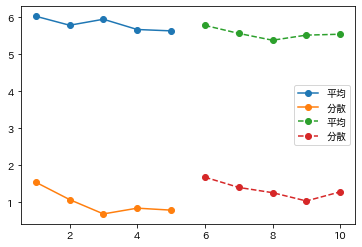

In [20]:
fig, axes = plt.subplots()

df9[0:5].plot(marker="o", ax=axes)
df9[5:10].plot(marker="o", linestyle="--", ax=axes)

性・年齢グループ間の相関行列を計算する。

In [21]:
round(df.corr(), 3)

,1,2,3,4,5,6,7,8,9,10
1,1.000,0.865,0.520,0.368,0.173,0.937,0.811,0.611,0.498,0.324
2,0.865,1.000,0.759,0.604,0.405,0.821,0.838,0.710,0.647,0.457
3,0.520,0.759,1.000,0.852,0.726,0.517,0.659,0.699,0.701,0.559
4,0.368,0.604,0.852,1.000,0.871,0.358,0.488,0.620,0.721,0.632
5,0.173,0.405,0.726,0.871,1.000,0.206,0.356,0.522,0.705,0.740
6,0.937,0.821,0.517,0.358,0.206,1.000,0.889,0.746,0.621,0.493
7,0.811,0.838,0.659,0.488,0.356,0.889,1.000,0.895,0.768,0.642
8,0.611,0.710,0.699,0.620,0.522,0.746,0.895,1.000,0.853,0.774
9,0.498,0.647,0.701,0.721,0.705,0.621,0.768,0.853,1.000,0.911
10,0.324,0.457,0.559,0.632,0.740,0.493,0.642,0.774,0.911,1.000


相関行列を用いて主成分を求める。

In [22]:
eigen_vals, eigen_vecs = np.linalg.eig(df.corr())

In [23]:
eig_vals_df = pd.DataFrame(eigen_vals)
eig_vals_df

,0
0,6.822309
1,1.757051
2,0.757508
3,0.259457
4,0.121943
5,0.023036
6,0.037608
7,0.045890
8,0.075872
9,0.099325


In [24]:
eig_vecs_df = pd.DataFrame(eigen_vecs)
eig_vecs_df

,0,1,2,3,4,5,6,7,8,9
0,-0.285426,-0.447303,-0.199443,-0.425367,0.170614,-0.650228,-0.125928,-0.140422,-0.100765,0.010078
1,-0.331511,-0.237759,-0.333015,-0.013543,-0.577007,0.143355,-0.070626,0.297429,0.498845,0.163409
2,-0.323829,0.165653,-0.439701,0.433529,-0.150303,-0.129170,0.044827,0.129240,-0.479515,-0.445518
3,-0.299361,0.359590,-0.371942,-0.056578,0.342523,0.063867,0.403485,-0.015971,-0.027886,0.595233
4,-0.260285,0.505959,-0.135287,-0.380316,0.164866,0.158953,-0.356664,-0.222027,0.331316,-0.417843
5,-0.308723,-0.409216,0.083254,-0.270631,0.285528,0.626083,0.031897,0.261528,-0.306463,-0.142197
6,-0.344644,-0.252519,0.171223,0.286855,-0.012251,0.108375,0.402223,-0.668006,0.238473,-0.170505
7,-0.347928,-0.031235,0.290860,0.511546,0.445561,-0.160195,-0.379242,0.287729,0.261398,0.112091
8,-0.345595,0.164019,0.323417,-0.044069,-0.394189,0.079430,-0.406082,-0.295529,-0.424854,0.390752
9,-0.303023,0.267486,0.523353,-0.252869,-0.187811,-0.273728,0.464336,0.375245,0.029980,-0.176839
